In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [2]:
mutation_data = pd.read_csv('full_mutation_data.csv')

In [3]:
mutation_data

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
0,0,MF362760,ND1,upstream_gene_variant,152,T,C,protein_coding,c.-3155T>C,NaN
1,1,MF362760,ND1,upstream_gene_variant,186,C,A,protein_coding,c.-3121C>A,NaN
2,2,MF362760,ND1,upstream_gene_variant,263,A,G,protein_coding,c.-3044A>G,NaN
3,3,MF362760,ND1,upstream_gene_variant,750,A,G,protein_coding,c.-2557A>G,NaN
4,4,MF362760,ND1,upstream_gene_variant,1438,A,G,protein_coding,c.-1869A>G,NaN
...,...,...,...,...,...,...,...,...,...,...
2676,2676,KF540700,ND6,upstream_gene_variant,16223,C,T,protein_coding,c.-1550G>A,NaN
2677,2677,KF540700,ND6,upstream_gene_variant,16242,C,T,protein_coding,c.-1569G>A,NaN
2678,2678,KF540700,ND6,upstream_gene_variant,16249,T,C,protein_coding,c.-1576A>G,NaN
2679,2679,KF540700,ND6,upstream_gene_variant,16319,G,A,protein_coding,c.-1646C>T,NaN


In [4]:
# Filtering the dataset based on the patient origin (Chinese and Armenian)
chinese_patients = mutation_data[mutation_data['Patient'].str.startswith('KF')]
armenian_patients = mutation_data[mutation_data['Patient'].str.startswith('MF')]


# Number of unique mutations
unique_mutations_chinese = chinese_patients.drop_duplicates(subset=['gene', 'loci', 'ref', 'alt']).shape[0]
unique_mutations_armenian = armenian_patients.drop_duplicates(subset=['gene', 'loci', 'ref', 'alt']).shape[0]

(unique_mutations_chinese, unique_mutations_armenian)


(384, 337)

In [5]:
# Filtering the dataset for mutations in the COX2 gene for both Chinese and Armenian populations
COX2_chinese = chinese_patients[chinese_patients['gene'] == 'COX2']
COX2_armenian = armenian_patients[armenian_patients['gene'] == 'COX2']

# Analyzing COX2 mutations
# 1. Number of unique mutations in COX2 for each population
# 2. Distribution of COX2 mutations across loci
# 3. Types of COX2 gene variants

# Number of unique mutations in COX2
unique_COX2_mutations_chinese = COX2_chinese.drop_duplicates(subset=['loci', 'ref', 'alt']).shape[0]
unique_COX2_mutations_armenian = COX2_armenian.drop_duplicates(subset=['loci', 'ref', 'alt']).shape[0]

(unique_COX2_mutations_chinese, unique_COX2_mutations_armenian)


(11, 13)

In [6]:
# Filtering the dataset for synonymous and non-synonymous mutations in the COX2 gene
COX2_chinese_synonymous = COX2_chinese[COX2_chinese['gene_variant'] == 'synonymous_variant']
COX2_chinese_missense = COX2_chinese[COX2_chinese['gene_variant'] == 'missense_variant']
COX2_armenian_synonymous = COX2_armenian[COX2_armenian['gene_variant'] == 'synonymous_variant']
COX2_armenian_missense = COX2_armenian[COX2_armenian['gene_variant'] == 'missense_variant']

# Counting the number of synonymous (dS) and non-synonymous (dN) mutations in each population
chinese_dS = COX2_chinese_synonymous.shape[0]
chinese_dN = COX2_chinese_missense.shape[0]
armenian_dS = COX2_armenian_synonymous.shape[0]
armenian_dN = COX2_armenian_missense.shape[0]

# Calculating the dN/dS ratio for each population
# Avoid division by zero by adding a small number (epsilon) to the denominator
epsilon = 1e-6
chinese_dN_dS_ratio = chinese_dN / (chinese_dS + epsilon)
armenian_dN_dS_ratio = armenian_dN / (armenian_dS + epsilon)

(chinese_dN_dS_ratio, armenian_dN_dS_ratio, chinese_dN, chinese_dS, armenian_dN, armenian_dS)


(0.44444439506173394, 0.23076921301775286, 4, 9, 3, 13)

In [7]:
COX2_armenian

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
93,93,MF362763,COX2,upstream_gene_variant,7476,C,T,protein_coding,c.-110C>T,NaN
175,175,MF362766,COX2,upstream_gene_variant,7476,C,T,protein_coding,c.-110C>T,NaN
176,176,MF362766,COX2,synonymous_variant,8251,G,A,protein_coding,c.666G>A,p.Gly222Gly
215,215,MF362767,COX2,missense_variant,7853,G,A,protein_coding,c.268G>A,p.Val90Ile
304,304,MF362770,COX2,synonymous_variant,8251,G,A,protein_coding,c.666G>A,p.Gly222Gly
382,382,MF362772,COX2,synonymous_variant,8137,C,T,protein_coding,c.552C>T,p.Phe184Phe
415,415,MF362773,COX2,synonymous_variant,7624,T,C,protein_coding,c.39T>C,p.Thr13Thr
454,454,MF362774,COX2,synonymous_variant,8251,G,A,protein_coding,c.666G>A,p.Gly222Gly
581,581,MF362779,COX2,missense_variant,8027,G,A,protein_coding,c.442G>A,p.Ala148Thr
677,677,MF362782,COX2,synonymous_variant,8137,C,T,protein_coding,c.552C>T,p.Phe184Phe


In [8]:
COX2_armenian_synonymous

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
176,176,MF362766,COX2,synonymous_variant,8251,G,A,protein_coding,c.666G>A,p.Gly222Gly
304,304,MF362770,COX2,synonymous_variant,8251,G,A,protein_coding,c.666G>A,p.Gly222Gly
382,382,MF362772,COX2,synonymous_variant,8137,C,T,protein_coding,c.552C>T,p.Phe184Phe
415,415,MF362773,COX2,synonymous_variant,7624,T,C,protein_coding,c.39T>C,p.Thr13Thr
454,454,MF362774,COX2,synonymous_variant,8251,G,A,protein_coding,c.666G>A,p.Gly222Gly
677,677,MF362782,COX2,synonymous_variant,8137,C,T,protein_coding,c.552C>T,p.Phe184Phe
931,931,MF362792,COX2,synonymous_variant,7642,G,A,protein_coding,c.57G>A,p.Glu19Glu
932,932,MF362792,COX2,synonymous_variant,7657,T,C,protein_coding,c.72T>C,p.His24His
1005,1005,MF362794,COX2,synonymous_variant,8251,G,A,protein_coding,c.666G>A,p.Gly222Gly
1156,1156,MF362801,COX2,synonymous_variant,7789,G,A,protein_coding,c.204G>A,p.Leu68Leu


In [9]:
COX2_armenian_missense

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
215,215,MF362767,COX2,missense_variant,7853,G,A,protein_coding,c.268G>A,p.Val90Ile
581,581,MF362779,COX2,missense_variant,8027,G,A,protein_coding,c.442G>A,p.Ala148Thr
1104,1104,MF362799,COX2,missense_variant,7746,A,G,protein_coding,c.161A>G,p.Asn54Ser


In [10]:
COX2_chinese_synonymous

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1271,1271,KF540657,COX2,synonymous_variant,8020,G,A,protein_coding,c.435G>A,p.Pro145Pro
1307,1307,KF540658,COX2,synonymous_variant,7828,A,G,protein_coding,c.243A>G,p.Leu81Leu
1308,1308,KF540658,COX2,synonymous_variant,7961,T,C,protein_coding,c.376T>C,p.Leu126Leu
1338,1338,KF540659,COX2,synonymous_variant,8260,T,C,protein_coding,c.675T>C,p.Phe225Phe
1642,1642,KF540669,COX2,synonymous_variant,7684,T,C,protein_coding,c.99T>C,p.Leu33Leu
1677,1677,KF540670,COX2,synonymous_variant,8020,G,A,protein_coding,c.435G>A,p.Pro145Pro
2285,2285,KF540689,COX2,synonymous_variant,8218,A,G,protein_coding,c.633A>G,p.Leu211Leu
2333,2333,KF540691,COX2,synonymous_variant,7594,T,C,protein_coding,c.9T>C,p.His3His
2491,2491,KF540695,COX2,synonymous_variant,8149,A,G,protein_coding,c.564A>G,p.Arg188Arg


In [11]:
COX2_chinese_missense

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1643,1643,KF540669,COX2,missense_variant,7853,G,A,protein_coding,c.268G>A,p.Val90Ile
1740,1740,KF540672,COX2,missense_variant,7853,G,A,protein_coding,c.268G>A,p.Val90Ile
2417,2417,KF540693,COX2,missense_variant,7598,G,A,protein_coding,c.13G>A,p.Ala5Thr
2490,2490,KF540695,COX2,missense_variant,7934,A,G,protein_coding,c.349A>G,p.Ile117Val


In [12]:
common_COX2_armenian_cols = COX2_armenian['mutation_nucleotide'].isin(COX2_chinese['mutation_nucleotide'])
common_COX2_armenian_cols
common_COX2_armenian = COX2_armenian.loc[common_COX2_armenian_cols, :]
common_COX2_armenian

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
215,215,MF362767,COX2,missense_variant,7853,G,A,protein_coding,c.268G>A,p.Val90Ile


In [13]:
common_COX2_chinese_cols = COX2_chinese['mutation_nucleotide'].isin(COX2_armenian['mutation_nucleotide'])
common_COX2_chinese_cols
common_COX2_chinese = COX2_chinese.loc[common_COX2_chinese_cols, :]
common_COX2_chinese

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1643,1643,KF540669,COX2,missense_variant,7853,G,A,protein_coding,c.268G>A,p.Val90Ile
1740,1740,KF540672,COX2,missense_variant,7853,G,A,protein_coding,c.268G>A,p.Val90Ile


In [14]:
# Filtering the dataset for synonymous and non-synonymous mutations in the COX2 gene
common_COX2_chinese_synonymous = common_COX2_chinese[common_COX2_chinese['gene_variant'] == 'synonymous_variant']
common_COX2_chinese_missense = common_COX2_chinese[common_COX2_chinese['gene_variant'] == 'missense_variant']
common_COX2_armenian_synonymous = common_COX2_armenian[common_COX2_armenian['gene_variant'] == 'synonymous_variant']
common_COX2_armenian_missense = common_COX2_armenian[common_COX2_armenian['gene_variant'] == 'missense_variant']

# Counting the number of synonymous (dS) and non-synonymous (dN) mutations in each population
common_chinese_dS = common_COX2_chinese_synonymous.shape[0]
common_chinese_dN = common_COX2_chinese_missense.shape[0]
common_armenian_dS = common_COX2_armenian_synonymous.shape[0]
common_armenian_dN = common_COX2_armenian_missense.shape[0]

# Calculating the dN/dS ratio for each population
# Avoid division by zero by adding a small number (epsilon) to the denominator
epsilon = 1e-6
common_chinese_dN_dS_ratio = common_chinese_dN / (common_chinese_dS + epsilon)
common_armenian_dN_dS_ratio = common_armenian_dN / (common_armenian_dS + epsilon)

(common_chinese_dN_dS_ratio, common_armenian_dN_dS_ratio, common_chinese_dN, common_chinese_dS, common_armenian_dN, common_armenian_dS)


(2000000.0, 1000000.0, 2, 0, 1, 0)

In [15]:
# Create a boolean mask to identify common rows in COX2_armenian
mask = COX2_armenian[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']].isin(common_COX2_armenian[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']]).all(axis=1)

# Invert the mask to select rows that are not common
COX2_armenian_unique = COX2_armenian[~mask]

# Display the DataFrame with unique mutations for COX2_armenian
COX2_armenian_unique


,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
93,93,MF362763,COX2,upstream_gene_variant,7476,C,T,protein_coding,c.-110C>T,NaN
175,175,MF362766,COX2,upstream_gene_variant,7476,C,T,protein_coding,c.-110C>T,NaN
176,176,MF362766,COX2,synonymous_variant,8251,G,A,protein_coding,c.666G>A,p.Gly222Gly
304,304,MF362770,COX2,synonymous_variant,8251,G,A,protein_coding,c.666G>A,p.Gly222Gly
382,382,MF362772,COX2,synonymous_variant,8137,C,T,protein_coding,c.552C>T,p.Phe184Phe
415,415,MF362773,COX2,synonymous_variant,7624,T,C,protein_coding,c.39T>C,p.Thr13Thr
454,454,MF362774,COX2,synonymous_variant,8251,G,A,protein_coding,c.666G>A,p.Gly222Gly
581,581,MF362779,COX2,missense_variant,8027,G,A,protein_coding,c.442G>A,p.Ala148Thr
677,677,MF362782,COX2,synonymous_variant,8137,C,T,protein_coding,c.552C>T,p.Phe184Phe
713,713,MF362783,COX2,upstream_gene_variant,7476,C,T,protein_coding,c.-110C>T,NaN


In [16]:
# Create a boolean mask to identify common rows in COX2_armenian
mask = COX2_chinese[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']].isin(common_COX2_chinese[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']]).all(axis=1)

# Invert the mask to select rows that are not common
COX2_chinese_unique = COX2_chinese[~mask]

# Display the DataFrame with unique mutations for COX2_armenian
COX2_chinese_unique


,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1271,1271,KF540657,COX2,synonymous_variant,8020,G,A,protein_coding,c.435G>A,p.Pro145Pro
1307,1307,KF540658,COX2,synonymous_variant,7828,A,G,protein_coding,c.243A>G,p.Leu81Leu
1308,1308,KF540658,COX2,synonymous_variant,7961,T,C,protein_coding,c.376T>C,p.Leu126Leu
1338,1338,KF540659,COX2,synonymous_variant,8260,T,C,protein_coding,c.675T>C,p.Phe225Phe
1642,1642,KF540669,COX2,synonymous_variant,7684,T,C,protein_coding,c.99T>C,p.Leu33Leu
1677,1677,KF540670,COX2,synonymous_variant,8020,G,A,protein_coding,c.435G>A,p.Pro145Pro
2285,2285,KF540689,COX2,synonymous_variant,8218,A,G,protein_coding,c.633A>G,p.Leu211Leu
2333,2333,KF540691,COX2,synonymous_variant,7594,T,C,protein_coding,c.9T>C,p.His3His
2417,2417,KF540693,COX2,missense_variant,7598,G,A,protein_coding,c.13G>A,p.Ala5Thr
2490,2490,KF540695,COX2,missense_variant,7934,A,G,protein_coding,c.349A>G,p.Ile117Val


In [17]:
# Filtering the dataset for synonymous and non-synonymous mutations in the COX2 gene
COX2_chinese_synonymous_unique = COX2_chinese_unique[COX2_chinese_unique['gene_variant'] == 'synonymous_variant']
COX2_chinese_missense_unique = COX2_chinese_unique[COX2_chinese_unique['gene_variant'] == 'missense_variant']
COX2_armenian_synonymous_unique = COX2_armenian_unique[COX2_armenian_unique['gene_variant'] == 'synonymous_variant']
COX2_armenian_missense_unique = COX2_armenian_unique[COX2_armenian_unique['gene_variant'] == 'missense_variant']

# Counting the number of synonymous (dS) and non-synonymous (dN) mutations in each population
chinese_dS_unique = COX2_chinese_synonymous_unique.shape[0]
chinese_dN_unique = COX2_chinese_missense_unique.shape[0]
armenian_dS_unique = COX2_armenian_synonymous_unique.shape[0]
armenian_dN_unique = COX2_armenian_missense_unique.shape[0]

# Calculating the dN/dS ratio for each population
# Avoid division by zero by adding a small number (epsilon) to the denominator
epsilon = 1e-6
chinese_dN_dS_ratio_unique = chinese_dN_unique / (chinese_dS_unique + epsilon)
armenian_dN_dS_ratio_unique = armenian_dN_unique / (armenian_dS_unique + epsilon)

(chinese_dN_dS_ratio_unique, armenian_dN_dS_ratio_unique, chinese_dN_unique, chinese_dS_unique, armenian_dN_unique, armenian_dS_unique)


(0.22222219753086697, 0.15384614201183525, 2, 9, 2, 13)

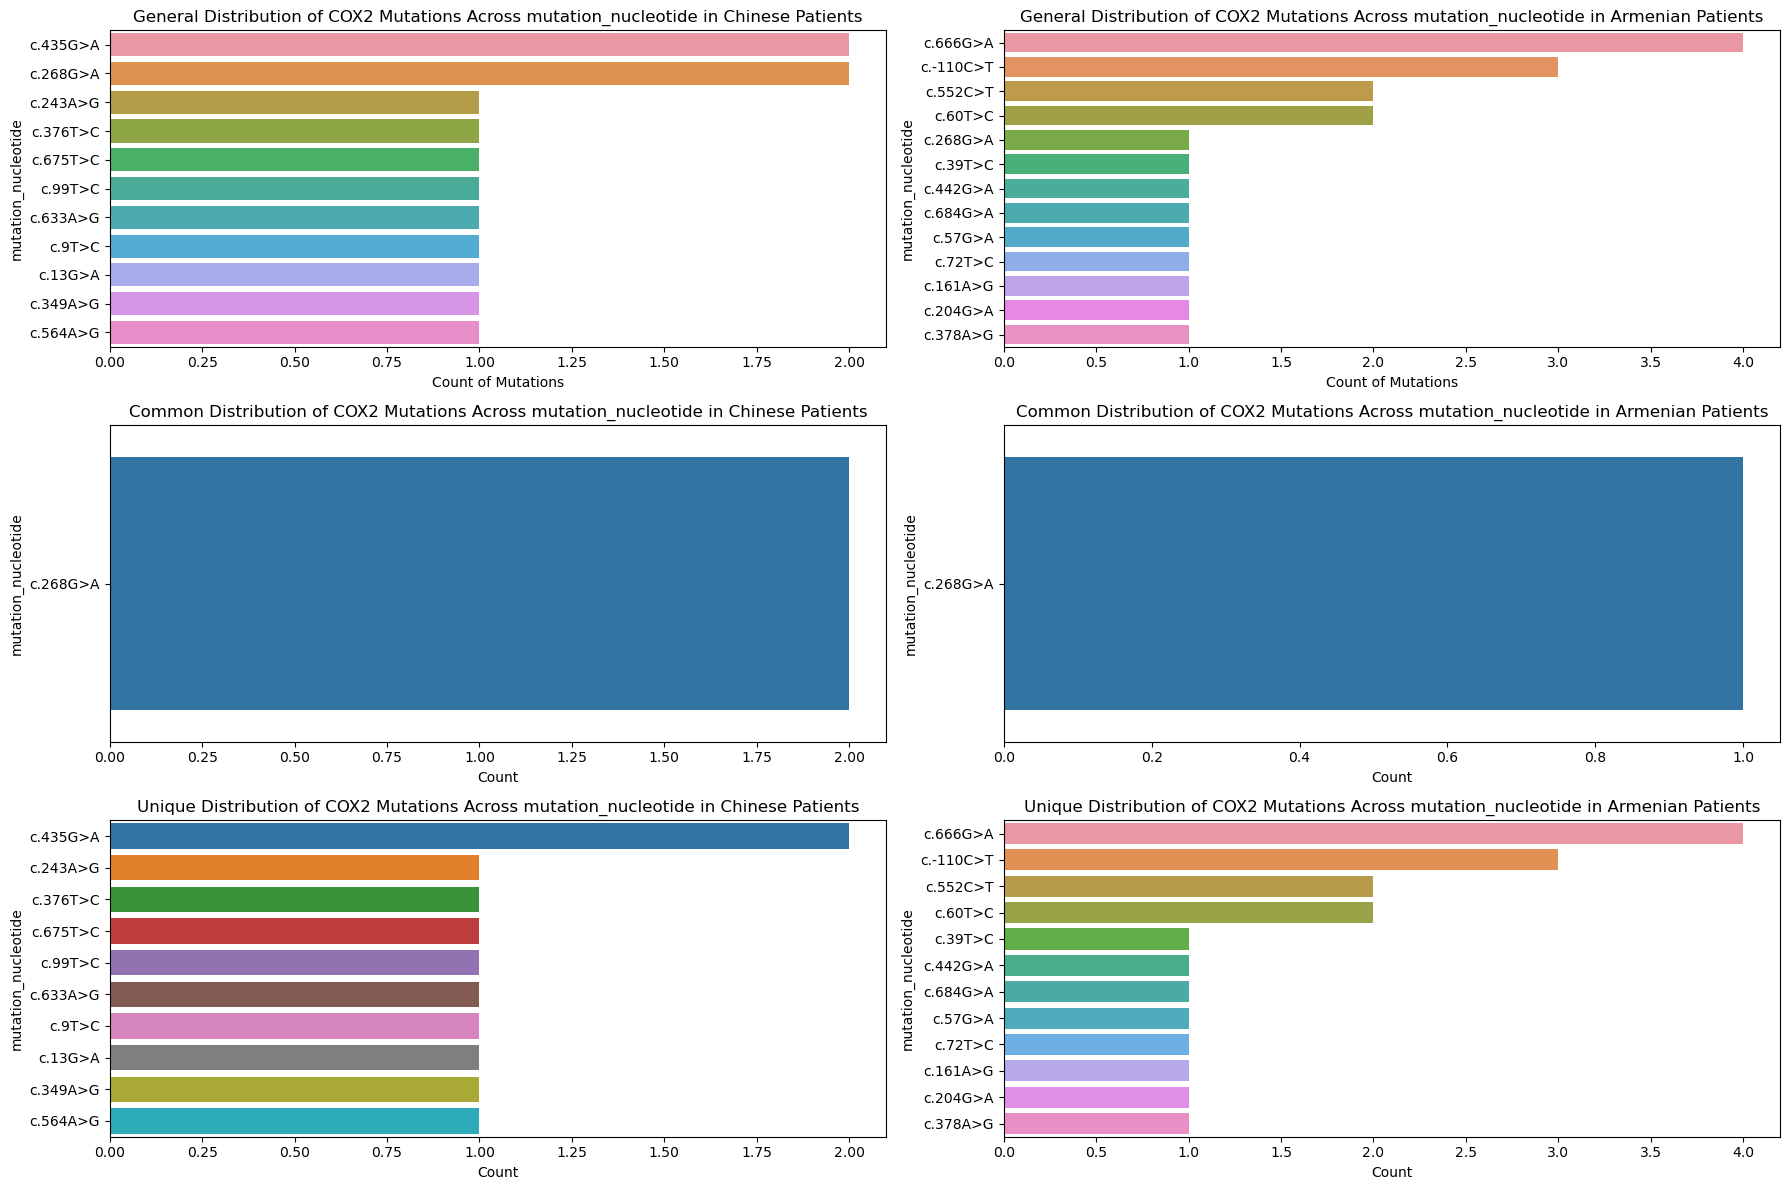

In [18]:
# Filtering the dataset for mutations in the COX2 gene for both Chinese and Armenian populations
# Analyzing COX2 mutations
# 1. Number of unique mutations in COX2 for each population
# 2. Distribution of COX2 mutations across loci
# 3. Types of COX2 gene variants

# Creating subplots for visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Plot 1: Distribution of COX2 mutations across loci for Chinese patients
sns.countplot(y="mutation_nucleotide", data=COX2_chinese, order=COX2_chinese['mutation_nucleotide'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('General Distribution of COX2 Mutations Across mutation_nucleotide in Chinese Patients')
axes[0, 0].set_xlabel('Count of Mutations')
axes[0, 0].set_ylabel('mutation_nucleotide')

# Plot 2: Distribution of COX2 mutations across loci for Armenian patients
sns.countplot(y="mutation_nucleotide", data=COX2_armenian, order=COX2_armenian['mutation_nucleotide'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('General Distribution of COX2 Mutations Across mutation_nucleotide in Armenian Patients')
axes[0, 1].set_xlabel('Count of Mutations')
axes[0, 1].set_ylabel('mutation_nucleotide')

# Plot 3: Types of COX2 gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=common_COX2_chinese, order= common_COX2_chinese['mutation_nucleotide'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Common Distribution of COX2 Mutations Across mutation_nucleotide in Chinese Patients')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('mutation_nucleotide')

# Plot 4: Types of COX2 gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=common_COX2_armenian, order=common_COX2_armenian['mutation_nucleotide'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title('Common Distribution of COX2 Mutations Across mutation_nucleotide in Armenian Patients')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('mutation_nucleotide')

# Plot 5: Types of COX2 gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=COX2_chinese_unique, order= COX2_chinese_unique['mutation_nucleotide'].value_counts().index, ax=axes[2, 0])
axes[2, 0].set_title('Unique Distribution of COX2 Mutations Across mutation_nucleotide in Chinese Patients')
axes[2, 0].set_xlabel('Count')
axes[2, 0].set_ylabel('mutation_nucleotide')

# Plot 6: Types of COX2 gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=COX2_armenian_unique, order=COX2_armenian_unique['mutation_nucleotide'].value_counts().index, ax=axes[2, 1])
axes[2, 1].set_title('Unique Distribution of COX2 Mutations Across mutation_nucleotide in Armenian Patients')
axes[2, 1].set_xlabel('Count')
axes[2, 1].set_ylabel('mutation_nucleotide')

plt.tight_layout()
plt.show()




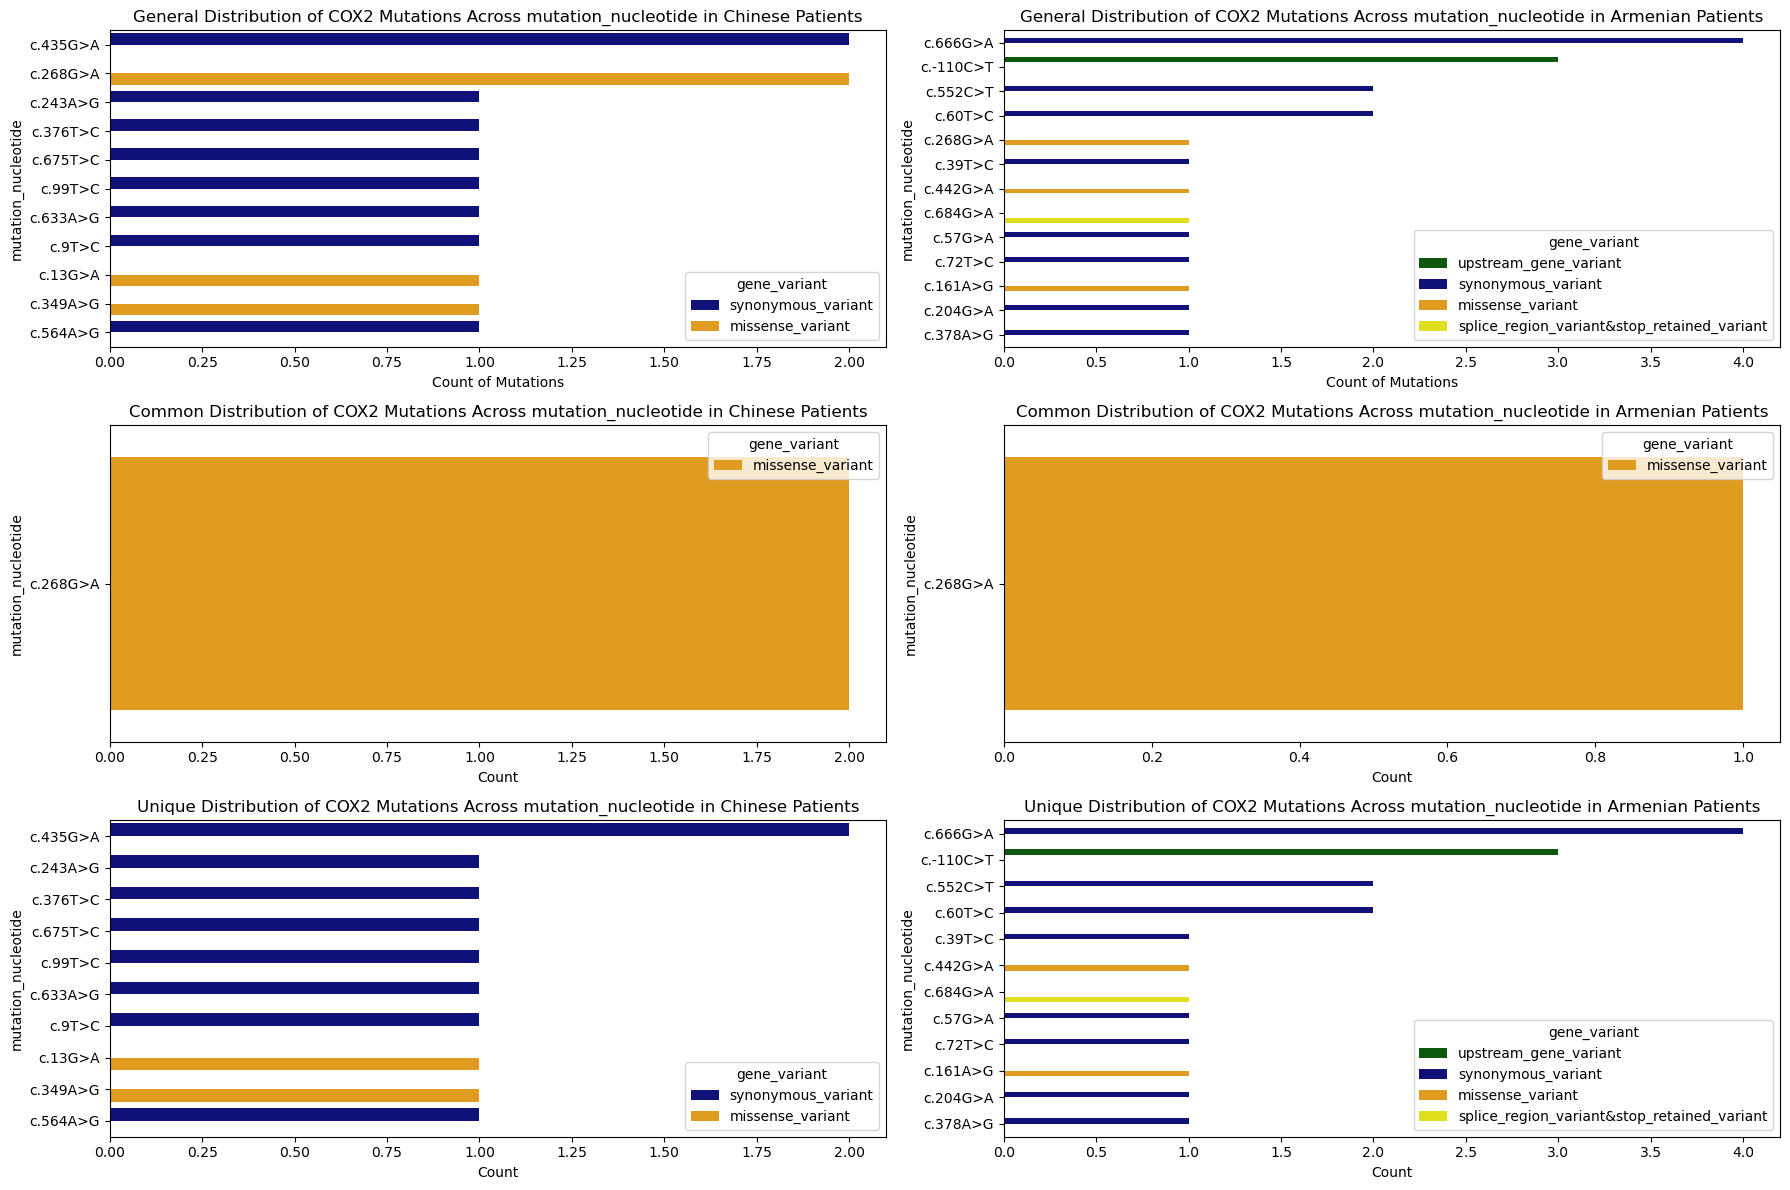

General dn/ds Chinese 0.44444439506173394
General dn/ds Armenian 0.23076921301775286
Common dn/ds Chinese 2000000.0
Common dn/ds Armenian 1000000.0
Unique dn/ds Chinese 0.22222219753086697
Unique dn/ds Armenian 0.15384614201183525


In [20]:
# Filtering the dataset for mutations in the COX2 gene for both Chinese and Armenian populations
# Analyzing COX2 mutations
# 1. Number of unique mutations in COX2 for each population
# 2. Distribution of COX2 mutations across loci
# 3. Types of COX2 gene variants

# Creating subplots for visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Plot 1: Distribution of COX2 mutations across loci for Chinese patients
hue_column = 'gene_variant'
color_palette = {"synonymous_variant": "darkblue", "missense_variant": "orange", 'upstream_gene_variant': "darkgreen", 'missense_variant&splice_region_variant': "pink", 'splice_region_variant&stop_retained_variant': "yellow"}
sns.countplot(y="mutation_nucleotide", data=COX2_chinese, order=COX2_chinese['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[0, 0])
axes[0, 0].set_title('General Distribution of COX2 Mutations Across mutation_nucleotide in Chinese Patients')
axes[0, 0].set_xlabel('Count of Mutations')
axes[0, 0].set_ylabel('mutation_nucleotide')

# Plot 2: Distribution of COX2 mutations across loci for Armenian patients
sns.countplot(y="mutation_nucleotide", data=COX2_armenian, order=COX2_armenian['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[0, 1])
axes[0, 1].set_title('General Distribution of COX2 Mutations Across mutation_nucleotide in Armenian Patients')
axes[0, 1].set_xlabel('Count of Mutations')
axes[0, 1].set_ylabel('mutation_nucleotide')

# Plot 3: Types of COX2 gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=common_COX2_chinese, order= common_COX2_chinese['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[1, 0])
axes[1, 0].set_title('Common Distribution of COX2 Mutations Across mutation_nucleotide in Chinese Patients')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('mutation_nucleotide')

# Plot 4: Types of COX2 gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=common_COX2_armenian, order=common_COX2_armenian['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[1, 1])
axes[1, 1].set_title('Common Distribution of COX2 Mutations Across mutation_nucleotide in Armenian Patients')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('mutation_nucleotide')

# Plot 5: Types of COX2 gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=COX2_chinese_unique, order= COX2_chinese_unique['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[2, 0])
axes[2, 0].set_title('Unique Distribution of COX2 Mutations Across mutation_nucleotide in Chinese Patients')
axes[2, 0].set_xlabel('Count')
axes[2, 0].set_ylabel('mutation_nucleotide')

# Plot 6: Types of COX2 gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=COX2_armenian_unique, order=COX2_armenian_unique['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[2, 1])
axes[2, 1].set_title('Unique Distribution of COX2 Mutations Across mutation_nucleotide in Armenian Patients')
axes[2, 1].set_xlabel('Count')
axes[2, 1].set_ylabel('mutation_nucleotide')

plt.tight_layout()
plt.show()

print("General dn/ds Chinese", chinese_dN_dS_ratio)
print("General dn/ds Armenian", armenian_dN_dS_ratio)
print("Common dn/ds Chinese", common_chinese_dN_dS_ratio)
print("Common dn/ds Armenian", common_armenian_dN_dS_ratio)
print("Unique dn/ds Chinese", chinese_dN_dS_ratio_unique)
print("Unique dn/ds Armenian", armenian_dN_dS_ratio_unique)
